In [1]:
# Import necessary libraries
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize Spark session
spark = SparkSession.builder.appName("Netflix EDA").getOrCreate()

In [3]:
!pip install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


In [5]:
# Load the dataset using PySpark
df = spark.read.csv(path, header=True, inferSchema=True)

# Show the first few rows of the dataset
df.show(5)

+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|       director|                cast|      country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|Kirsten Johnson|                NULL|United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|           NULL|Ama Qamata, Khosi...| South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglands|Julien Leclercq|Sami Bouajila, Tr...|         NULL|Septem

In [6]:
# Show the schema of the dataset
df.printSchema()

# Show basic statistics (summary of numeric columns)
df.describe().show()

root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)

+-------+--------------------+-------------+---------------------------------+--------------------+--------------------+----------------+---------------+-----------------+-----------------+-------------+--------------------+--------------------+
|summary|             show_id|         type|                            title|            director|                cast|         country|     date_added|     release_year|           rating|     duration|           listed_in|         description|
+-------+------------------

In [8]:
pandas_df = df.toPandas()
# Check for non-numeric values in the 'release_year' column
pandas_df['release_year'] = pd.to_numeric(pandas_df['release_year'], errors='coerce')
# Drop rows with missing release years (optional)
pandas_df = pandas_df.dropna(subset=['release_year'])

# Alternatively, fill missing values with a default value (e.g., the mean or median)
# pandas_df['release_year'] = pandas_df['release_year'].fillna(pandas_df['release_year'].median())

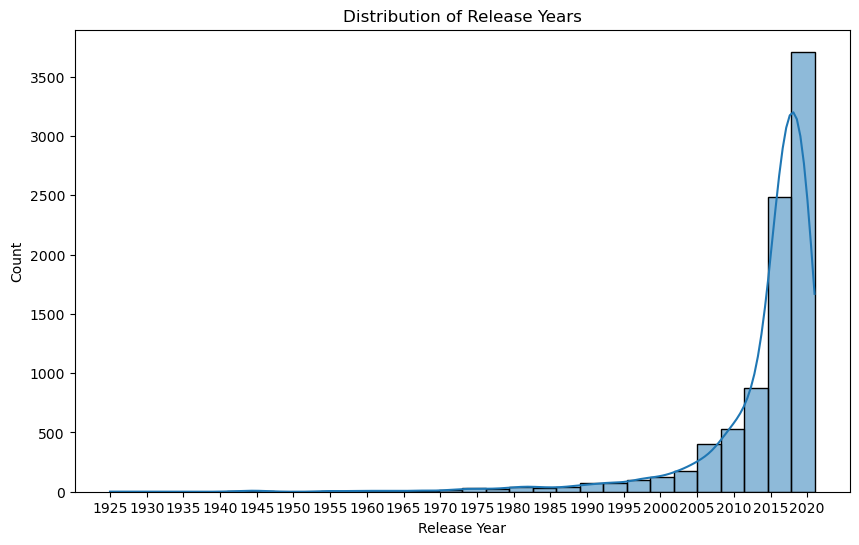

In [9]:
# Example: Plotting a histogram of the release years after cleaning
plt.figure(figsize=(10,6))
sns.histplot(pandas_df['release_year'], bins=30, kde=True)

# Add x-ticks every 5 years
year_range = range(int(pandas_df['release_year'].min()), int(pandas_df['release_year'].max()) + 1, 5)
plt.xticks(year_range)

# Add labels and title
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')

# Display the plot
plt.show()